Create regression models for the given data set.

● Separate the columns to be used for the SLR model and the MLR model.

● Set aside 10% of the dataset (will serve as unseen data).

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Read the dataset
df = pd.read_csv('housePriceData.csv')

#Simple Linear Regression
slr_feature = df[['damages']]
slr_target = df['discount']
slr_feature_train, slr_feature_test, slr_target_train, slr_target_test = train_test_split(
    slr_feature, slr_target , test_size=0.1, random_state=42)

#Multiple Linear Regression
mlr_features = df[['size', 'bedrooms', 'bathrooms', 'extraRooms', 'garage',
                'garden', 'inSubdivision', 'inCity', 'solarPowered']]
mlr_target = df['price']
mlr_features_train, mlr_features_test, mlr_target_train, mlr_target_test = train_test_split(
    mlr_features, mlr_target, test_size=0.1, random_state=42)

Simple Linear Regression Model (SLR)
Predict how much discount should be given considering any
damage in the house. The dataset has a column for number of damages and another
column for the discount that can be given (around $1 for every damage discovered).

A. Display the descriptive statistics of the discount amounts.
Question: Describe the amount based on the different descriptive statistics.


In [45]:
# Calculate descriptive statistics for discount amounts 
discount_stats = slr_target_train.describe()
print("Descriptive Statistics of Discount Amounts:")
discount_stats

Descriptive Statistics of Discount Amounts:


count    270.000000
mean      51.251191
std       28.426316
min       -3.467884
25%       25.706843
50%       52.787876
75%       73.755678
max      105.591837
Name: discount, dtype: float64

B. Create a scatter plot using the “damages” column as the independent variable and the “discount” column as the dependent variable.
Question: Describe the relationship between these variables.


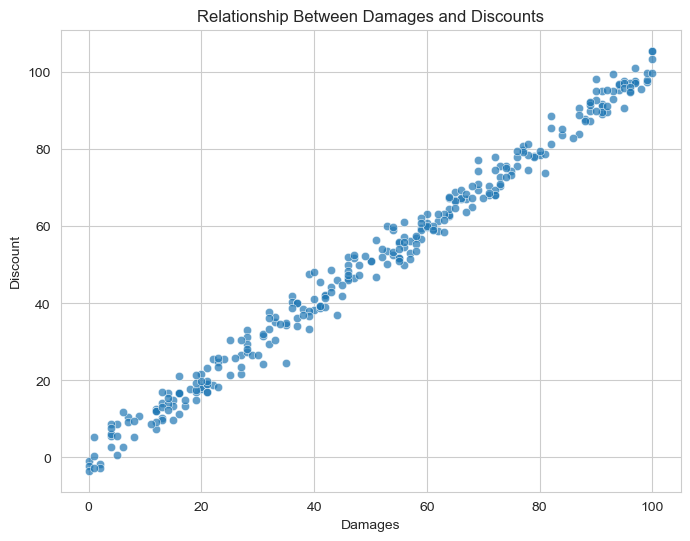

In [46]:
# Create scatter plot: Damages vs. Discount
plt.figure(figsize=(8, 6))
sns.scatterplot(x='damages', y='discount', data=df, alpha=0.7)
plt.title('Relationship Between Damages and Discounts')
plt.xlabel('Damages')
plt.ylabel('Discount')
plt.grid(True)
plt.show()


C. Determine the correlation between the “damages” and “discount” columns.
Question: Based on the computed correlation coefficient and visualization, give an interpretation.


In [47]:
# Calculate correlation 
correlation = slr_feature_train.join(slr_target_train).corr().loc['damages', 'discount']
print(f"Correlation between Damages and Discount: {correlation: .4f}")


Correlation between Damages and Discount:  0.9943


D. Create a simple linear regression model using the “damages” column as the
independent variable and the “discount” column as the dependent variable.
Question: What is the regression model interpret the regression model.


In [48]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Define the independent and dependent variables for training
train_features_damages = slr_feature_train  # 'damages' column
train_target_discount = slr_target_train    # 'discount' column

# Initialize and train the simple linear regression model
simple_lr_model = LinearRegression()
simple_lr_model.fit(train_features_damages, train_target_discount)

# Extract and display model coefficients
intercept_discount = simple_lr_model.intercept_
slope_damages = simple_lr_model.coef_[0]

print(f"Regression Equation: Discount = {intercept_discount:.4f} + {slope_damages:.4f} * Damages")
print(f"Intercept: {intercept_discount:.4f}") 
print(f"Slope: {slope_damages:.4f}")

Regression Equation: Discount = -0.3075 + 1.0107 * Damages
Intercept: -0.3075
Slope: 1.0107


E. Evaluate the developed regression model based on different performance metrics and discuss the OLS regression results.
Question: Discuss the performance of the model.


In [49]:
from sklearn import metrics
import numpy as np

# Define the test data
test_features_damages = slr_feature_test  # 'damages' test data
test_target_discount = slr_target_test    # 'discount' test labels

# Predict using the trained model
predicted_discounts = simple_lr_model.predict(test_features_damages)

# Evaluate the model
print("Model Evaluation Metrics:")
print(f"R² Score: {metrics.r2_score(test_target_discount, predicted_discounts):.4f}")
print(f"MAE (Mean Absolute Error): {metrics.mean_absolute_error(test_target_discount, predicted_discounts):.4f}")
print(f"MSE (Mean Squared Error): {metrics.mean_squared_error(test_target_discount, predicted_discounts):.4f}")
rmse = np.sqrt(metrics.mean_squared_error(test_target_discount, predicted_discounts))
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
# Get OLS (Ordinary Least Squares) summary using statsmodels
train_features_damages_ols = sm.add_constant(train_features_damages)
ols_model = sm.OLS(train_target_discount, train_features_damages_ols).fit()

# Print regression summary table
print("\nOLS Regression Summary:")
print(ols_model.summary())


Model Evaluation Metrics:
R² Score: 0.9916
MAE (Mean Absolute Error): 2.6124
MSE (Mean Squared Error): 9.9263
RMSE (Root Mean Squared Error): 3.1506

OLS Regression Summary:
                            OLS Regression Results                            
Dep. Variable:               discount   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 2.346e+04
Date:                Sat, 12 Apr 2025   Prob (F-statistic):          5.96e-263
Time:                        20:32:29   Log-Likelihood:                -681.13
No. Observations:                 270   AIC:                             1366.
Df Residuals:                     268   BIC:                             1373.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err    

F. Predict the discount amounts on the remaining 10% unseen data.
Question: Document and describe the results of predictions.


In [50]:
y_slr_test_pred = simple_lr_model.predict(slr_feature_test)
test_mse = mean_squared_error(slr_target_test, y_slr_test_pred)
test_r2 = r2_score(slr_target_test, y_slr_test_pred)

print("\nPredictions on Unseen Data (10% of dataset):")
results = pd.DataFrame({'Actual': slr_target_test, 'Predicted': y_slr_test_pred})
print(results)
print(f"\nTest MSE: {test_mse:.2f}")
print(f"Test R-squared: {test_r2:.4f}")


Predictions on Unseen Data (10% of dataset):
         Actual   Predicted
203   92.887723   90.651975
266   79.503415   76.502729
152   97.001484   94.694617
9      8.746748    4.745838
233   89.739520   91.662635
226  105.450379  100.758579
196    8.655714    3.735177
109   -2.344739   -0.307464
5      9.805235   14.852442
175   37.801828   32.033670
237   11.217105   15.863103
57    62.600898   64.374804
218    9.241139   11.820461
45    36.113348   37.086972
182   99.435779   93.683956
221  103.526616  100.758579
289   59.129130   61.342822
211   41.903689   45.172255
148   34.853482   35.065651
165   44.188639   43.150934
78    52.019323   52.246878
113   97.703422   97.726598
249   36.941732   38.097632
250   19.875622   20.916405
104   41.976071   42.140274
42    50.961555   50.225557
281   30.413033   24.959046
295   68.545888   71.449427
157   95.124005   93.683956
238    0.676077    4.745838

Test MSE: 9.93
Test R-squared: 0.9916


B. Multiple Linear Regression (MLR): Predict the possible price of a house by correlating the price column with ONLY the following attributes/columns in the dataset:
● size (in square meters)
● number of bedrooms
● number of bathrooms
● number of extra rooms
● presence of a garage (0 - no, 1- yes)
● presence of a garden (0 - no, 1- yes)
● if the house is in a subdivision (0 - no, 1- yes)
● if the house is located in a city (0 - no, 1- yes)
● if the house is solar powered (0 - no, 1- yes)

A. Display the descriptive statistics of the selling price amounts.
Question: Describe the price based on the different descriptive statistics.

In [56]:
mlr_desc = mlr_target_train.describe()
print("\nDescriptive Statistics for House Prices:")
print(mlr_desc)


Descriptive Statistics for House Prices:
count      270.000000
mean     42279.351852
std      12514.469768
min      11125.000000
25%      33631.250000
50%      40512.500000
75%      50656.250000
max      74000.000000
Name: price, dtype: float64


B. Create a multiple linear regression model using the “price” column as the dependent variable and the following columns as the independent variables:
● size

● bedrooms

● bathrooms

● extra rooms

● garage

● garden

● inSubdivision

● inCity

● solarPowered

Question: What is the regression model and explain the regression model.

In [57]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Train the Multiple Linear Regression model
mlr_model = LinearRegression()
mlr_model.fit(mlr_features_train, mlr_target_train)

# Get the intercept and coefficients
mlr_intercept = mlr_model.intercept_
mlr_coefficients = mlr_model.coef_
mlr_feature_names = mlr_features_train.columns

# Build the regression equation string
equation_terms = [f"{coef:.4f}*{feature}" for coef, feature in zip(mlr_coefficients, mlr_feature_names)]
regression_equation = f"Price = {mlr_intercept:.4f} + " + " + ".join(equation_terms)

# Print the regression equation
print("\nMultiple Linear Regression Equation:")
print(regression_equation)

# OLS Regression Summary
feature_mlr_train_sm = sm.add_constant(mlr_features_train)
sm_mlr = sm.OLS(mlr_target_train, feature_mlr_train_sm).fit()

print("\nOLS Regression Results for MLR:")
print(sm_mlr.summary())


Multiple Linear Regression Equation:
Price = 7543.6820 + 24.0859*size + 1681.8636*bedrooms + 1391.6981*bathrooms + 3452.1722*extraRooms + 9152.8429*garage + 14983.8514*garden + -4946.3315*inSubdivision + 11797.8359*inCity + 4442.1508*solarPowered

OLS Regression Results for MLR:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     2760.
Date:                Sat, 12 Apr 2025   Prob (F-statistic):          2.20e-252
Time:                        20:41:15   Log-Likelihood:                -2313.0
No. Observations:                 270   AIC:                             4646.
Df Residuals:                     260   BIC:                             4682.
Df Model:                           9                                         
Covarian

In [52]:
mlr_model = LinearRegression()
mlr_model.fit(mlr_features_train, mlr_target_train)

feature_mlr_train_sm = sm.add_constant(mlr_features_train)
sm_mlr = sm.OLS(mlr_target_train, feature_mlr_train_sm).fit()
print("\nOLS Regression Results for MLR:")
print(sm_mlr.summary())


OLS Regression Results for MLR:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     2760.
Date:                Sat, 12 Apr 2025   Prob (F-statistic):          2.20e-252
Time:                        20:32:29   Log-Likelihood:                -2313.0
No. Observations:                 270   AIC:                             4646.
Df Residuals:                     260   BIC:                             4682.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const        

C. Evaluate the developed multiple regression model based on different performance metrics
Question: Evaluate the developed multiple regression model based on different
performance metrics and discuss the OLS regression results.

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on test data (unseen)
y_mlr_test_pred = mlr_model.predict(mlr_features_test)

# Compute evaluation metrics on test set
mlr_test_mae = mean_absolute_error(mlr_target_test, y_mlr_test_pred)
mlr_test_mse = mean_squared_error(mlr_target_test, y_mlr_test_pred)
mlr_test_rmse = np.sqrt(mlr_test_mse)
mlr_test_r2 = r2_score(mlr_target_test, y_mlr_test_pred)

# Print results
print(f"\nMLR Model Evaluation on Unseen Test Data:")
print(f"R² Score: {mlr_test_r2:.4f}")
print(f"MAE (Mean Absolute Error): {mlr_test_mae:.4f}")
print(f"MSE (Mean Squared Error): {mlr_test_mse:.4f}")
print(f"RMSE (Root Mean Squared Error): {mlr_test_rmse:.4f}")

mlr_model = LinearRegression()
mlr_model.fit(mlr_features_train, mlr_target_train)

feature_mlr_train_sm = sm.add_constant(mlr_features_train)
sm_mlr = sm.OLS(mlr_target_train, feature_mlr_train_sm).fit()
print("\nOLS Regression Results for MLR:")
print(sm_mlr.summary())


MLR Model Evaluation on Unseen Test Data:
R² Score: 0.9952
MAE (Mean Absolute Error): 715.1941
MSE (Mean Squared Error): 790682.6058
RMSE (Root Mean Squared Error): 889.2034

OLS Regression Results for MLR:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     2760.
Date:                Sat, 12 Apr 2025   Prob (F-statistic):          2.20e-252
Time:                        20:56:32   Log-Likelihood:                -2313.0
No. Observations:                 270   AIC:                             4646.
Df Residuals:                     260   BIC:                             4682.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
  

D. Predict the house prices on the remaining 10% unseen data.
Question: Document and describe the results of predictions.

In [58]:
y_mlr_test_pred = mlr_model.predict(mlr_features_test)
mlr_test_mse = mean_squared_error(mlr_target_test, y_mlr_test_pred)
mlr_test_r2 = r2_score(mlr_target_test, y_mlr_test_pred)

print("\nPredictions on Unseen Data (10% of dataset):")
mlr_results = pd.DataFrame({'Actual': mlr_target_test, 'Predicted': y_mlr_test_pred})
print(mlr_results)
print(f"\nTest MSE: {mlr_test_mse:.2f}")
print(f"Test R-squared: {mlr_test_r2:.4f}")



Predictions on Unseen Data (10% of dataset):
     Actual     Predicted
203   33850  33271.206374
266   55625  56885.262154
152   26675  27315.195287
9     22300  22579.148809
233   44375  45649.559870
226   45225  45140.509839
196   36725  36948.319552
109   40575  40248.842455
5     54300  54427.034304
175   31875  31505.127202
237   60850  61867.320313
57    32675  33308.174445
218   52225  52785.565388
45    32400  33127.128095
182   56875  56574.121719
221   36125  34022.022866
289   59025  59251.279209
211   45425  46077.752618
148   45675  46372.099181
165   53950  53626.643848
78    33950  33687.274666
113   50050  49328.293285
249   15850  17194.814790
250   26775  24391.132462
104   59400  60099.685922
42    23850  22830.832748
281   27375  26686.692388
295   27600  26954.182397
157   50200  50539.011085
238   57475  56529.644859

Test MSE: 790682.61
Test R-squared: 0.9952
